In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings

import pandas as pd 
import seaborn as sns
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import mean_absolute_error, r2_score
import itertools


In [2]:
donate_data = pd.read_excel("/Users/macbook/Downloads/VeeRoute/Data.xlsx")

In [3]:
donate_data

,"date_time,cash"
0,"2018-01-09T10:11:05Z,205146.000279413"
1,"2018-01-09T13:19:10Z,152027.951692517"
2,"2018-01-09T13:22:27Z,1910.08833338259"
3,"2018-01-09T13:23:30Z,181898.214642849"
4,"2018-01-09T13:30:11Z,82061.541704419"
...,...
5163,"2019-12-27T11:42:17Z,2513.27412287183"
5164,"2019-12-27T14:01:55Z,471.238898038469"
5165,"2019-12-28T13:24:11Z,44156.341383266"
5166,"2019-12-28T13:26:05Z,140.115032350105"


In [4]:
donate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 1 columns):
date_time,cash    5168 non-null object
dtypes: object(1)
memory usage: 40.5+ KB


In [5]:
donate_data[['Date', 'Cash']] = donate_data['date_time,cash'].str.split(',', expand = True)
donate_data = donate_data.drop("date_time,cash", 1)
donate_data

,Date,Cash
0,2018-01-09T10:11:05Z,205146.000279413
1,2018-01-09T13:19:10Z,152027.951692517
2,2018-01-09T13:22:27Z,1910.08833338259
3,2018-01-09T13:23:30Z,181898.214642849
4,2018-01-09T13:30:11Z,82061.541704419
...,...,...
5163,2019-12-27T11:42:17Z,2513.27412287183
5164,2019-12-27T14:01:55Z,471.238898038469
5165,2019-12-28T13:24:11Z,44156.341383266
5166,2019-12-28T13:26:05Z,140.115032350105


In [6]:
donate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 2 columns):
Date    5168 non-null object
Cash    5168 non-null object
dtypes: object(2)
memory usage: 80.9+ KB


In [7]:
donate_data['Date'] = pd.to_datetime(donate_data['Date'])
donate_data['Cash'] = pd.to_numeric(donate_data['Cash'])

In [8]:
donate_data.Date.describe()

count                          5168
unique                         5168
top       2018-06-20 13:03:52+00:00
freq                              1
first     2018-01-09 10:11:05+00:00
last      2019-12-28 16:07:02+00:00
Name: Date, dtype: object

In [9]:
donate_data.Cash.describe()

count      5168.000000
mean      66863.969974
std       79348.056018
min           6.283185
25%         251.327412
50%       32652.457404
75%      156127.730105
max      261474.756558
Name: Cash, dtype: float64

In [10]:
donate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 2 columns):
Date    5168 non-null datetime64[ns, UTC]
Cash    5168 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 80.9 KB


In [11]:
# Сгруппируем донаты по дням (т.к. нас интересует прогноз по дням)

In [12]:
donate_data = donate_data.groupby(donate_data['Date'].map(lambda x: x.date)).sum()
donate_data

,Cash
Date,
2018-01-09,6.231349e+05
2018-01-10,4.189314e+05
2018-01-11,1.376951e+06
2018-01-12,1.013318e+06
2018-01-13,3.388264e+05
...,...
2019-12-24,6.657035e+05
2019-12-25,6.382145e+05
2019-12-26,4.517610e+05


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


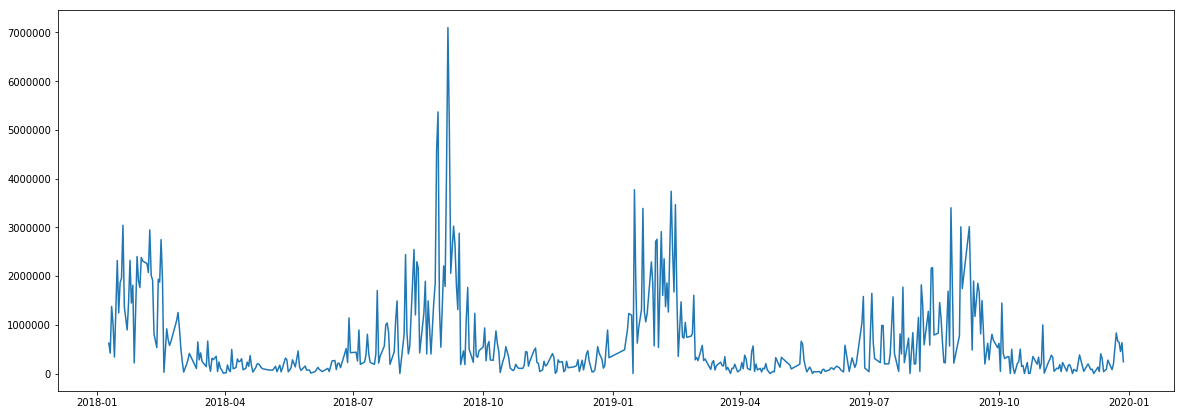

In [13]:
plt.figure(figsize=(20,7))
plt.plot(donate_data.Cash)

In [14]:
# В некоторые дни нет донатов, поэтому по ним нет никакой информации. 
# Добавим отсутствующие дни (выходные, праздники?) с суммой донатов 0

In [15]:
new_dates = pd.date_range('2018-01-01', '2019-12-31')
donate_data.index = pd.DatetimeIndex(donate_data.index)
donate_data = donate_data.reindex(new_dates, fill_value = 0)
#donate_data.index.name = 'Date'
donate_data.head(20)

,Cash
2018-01-01,0.000000e+00
2018-01-02,0.000000e+00
2018-01-03,0.000000e+00
2018-01-04,0.000000e+00
2018-01-05,0.000000e+00
2018-01-06,0.000000e+00
2018-01-07,0.000000e+00
2018-01-08,0.000000e+00
2018-01-09,6.231349e+05
2018-01-10,4.189314e+05


In [16]:
donate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
Cash    730 non-null float64
dtypes: float64(1)
memory usage: 11.4 KB


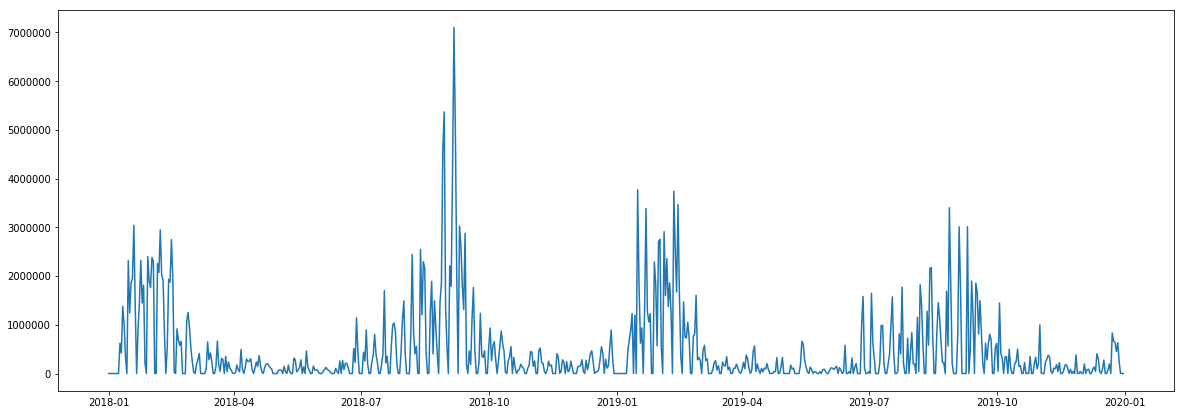

In [17]:
plt.figure(figsize=(20,7))
plt.plot(donate_data.Cash)

In [18]:
# Сразу заметны хорошие автокорреляции:

In [19]:
donate_data.Cash.autocorr(lag=364)

0.6472241341989579

In [20]:
donate_data.Cash.autocorr(lag=7) 

0.6117720566318766

In [21]:
def plotMovingAverage(series, n, plot_bounds=False):

    rolling_mean = series.rolling(window=n).mean()

    fig, ax = plt.subplots(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    

In [22]:
# Скользящая средняя за 14 дней

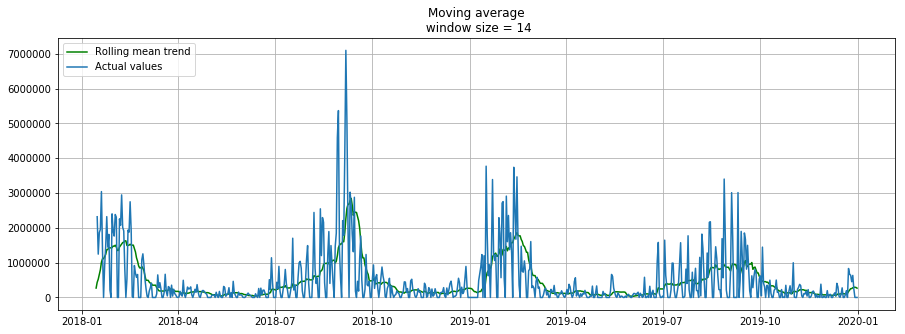

In [23]:
plotMovingAverage(donate_data.Cash, 14)

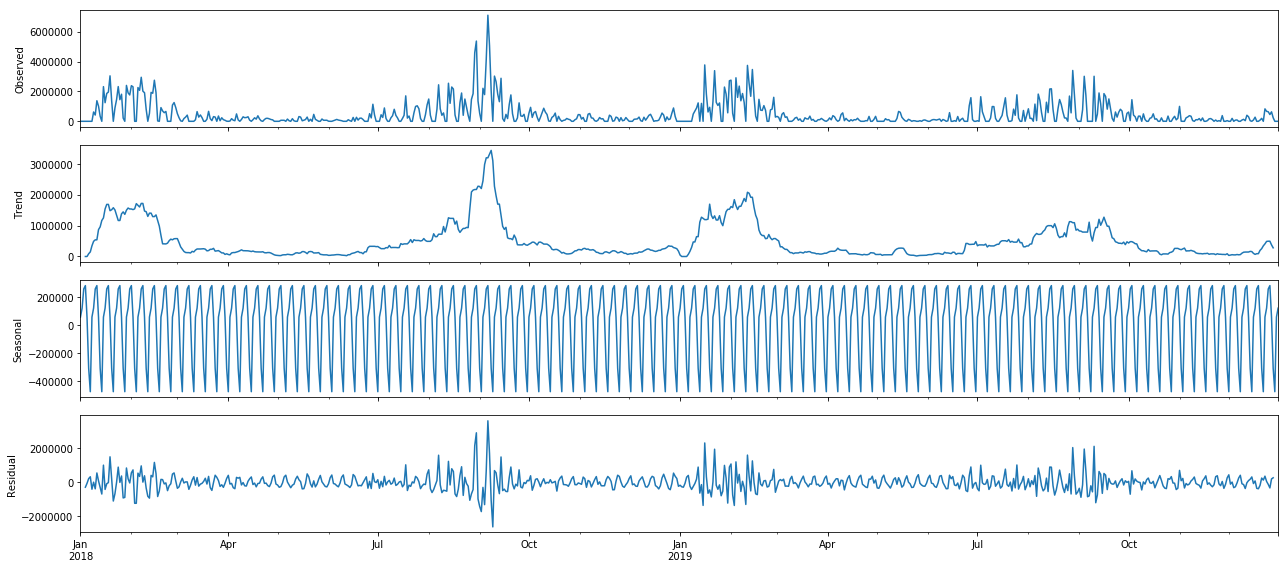

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(donate_data.Cash, model='additive')
fig = decomposition.plot()
plt.show()

In [25]:
def tsplot(y, lags=None, figsize=(12, 7), style="bmh"):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title("Time Series Analysis Plots")
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

Критерий Дики-Фуллера: p=0.013721


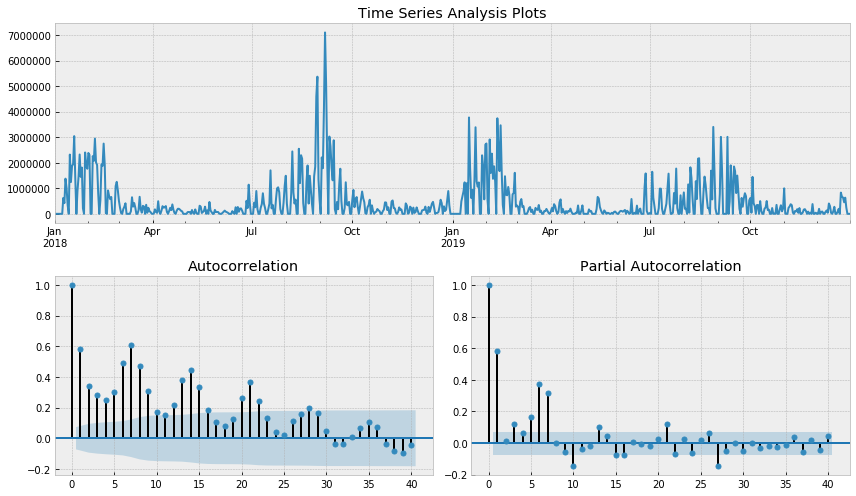

In [26]:
tsplot(donate_data.Cash, lags=40)

In [27]:
data = donate_data.copy()

In [28]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adfinput = adfuller(data["Cash"])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test     -3.3268
P-value                             0.0137
Used Lags                          20.0000
Number of comments used           709.0000
Critical Value (1%)                -3.4396
Critical Value (5%)                -2.8656
Critical Value (10%)               -2.5689
dtype: float64

In [29]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
kpss_input = kpss(data["Cash"])
kpss_test = pd.Series(kpss_input[0:3], index=['Statistical Test KPSS', 'P-Value', 'Used Lags'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Critical Value (%s)"%key] = value 
kpss_test

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Statistical Test KPSS     0.1624
P-Value                   0.1000
Used Lags                20.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

In [30]:
# Ряд нестационарный, имеется сильная сезонность
# (В преобразовании Бокса-Кокса нет необходимости)

Критерий Дики-Фуллера: p=0.000000


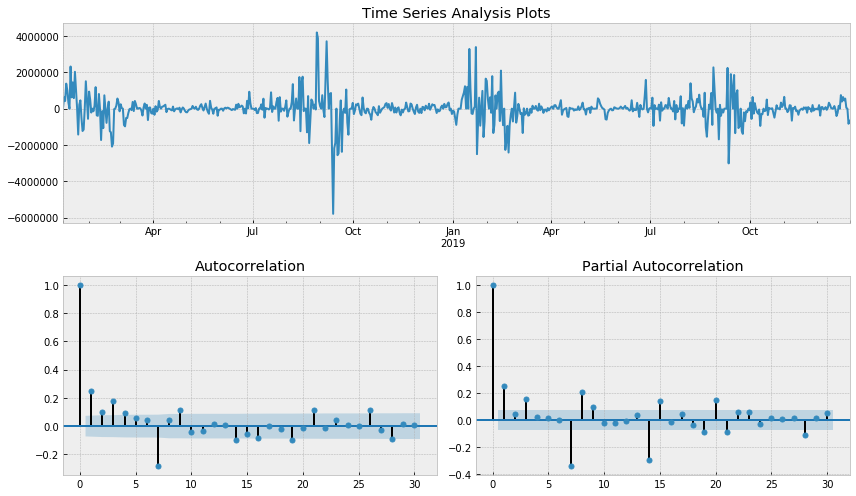

In [31]:
data["Cash_season"] = data.Cash - data.Cash.shift(7)
tsplot(data.Cash_season[7:], lags=30)

Критерий Дики-Фуллера: p=0.000000


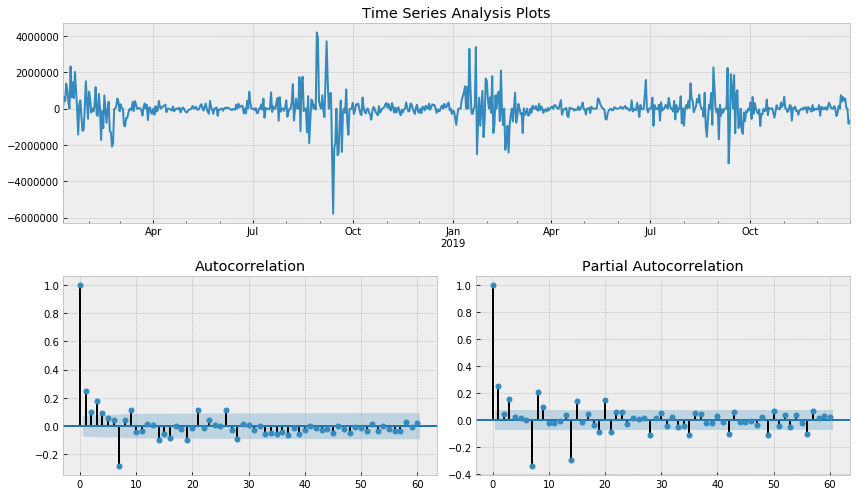

In [32]:
tsplot(data.Cash_season[7:], lags=60)

In [33]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
kpss_input = kpss(data["Cash_season"][7:])
kpss_test = pd.Series(kpss_input[0:3], index=['Statistical Test KPSS', 'P-Value', 'Used Lags'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Critical Value (%s)"%key] = value 
kpss_test

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Statistical Test KPSS     0.0325
P-Value                   0.1000
Used Lags                20.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

In [34]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adfinput = adfuller(data["Cash_season"][7:])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest

Dickey Fuller Statistical Test     -6.2242
P-value                             0.0000
Used Lags                          20.0000
Number of comments used           702.0000
Critical Value (1%)                -3.4397
Critical Value (5%)                -2.8657
Critical Value (10%)               -2.5690
dtype: float64

In [35]:
#  Теперь ряд стационарен

Критерий Дики-Фуллера: p=0.000000


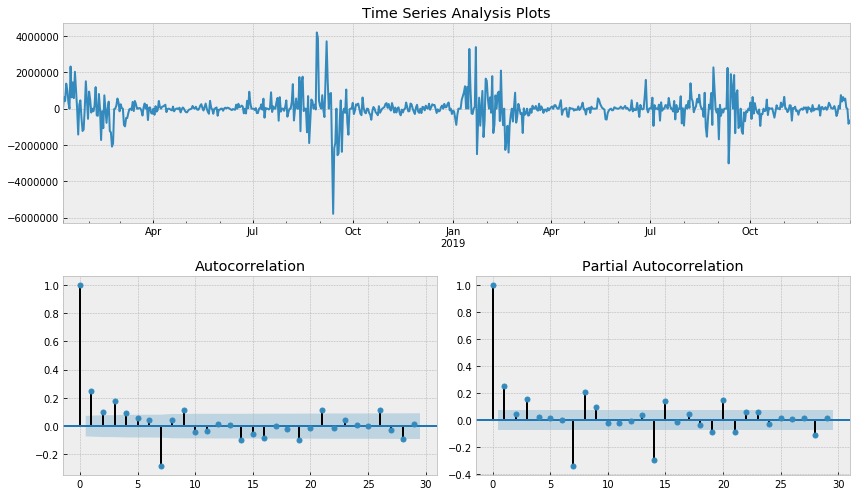

In [36]:
tsplot(data.Cash_season[7:], lags=29)

In [37]:
# Предварительные параметры (после 1 сезонного дифференцирования)
# Q = 2, q = 4, P = 2, p = 3 // сначала попробовал q = 3, Q = 1

In [38]:
ps = range(0, 4)
d = 0
qs = range(0, 5)
Ps = range(0, 3)
D = 1
Qs = range(0, 3)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

180

In [39]:
print(parameters_list)

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 2, 0), (0, 0, 2, 1), (0, 0, 2, 2), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 0, 2), (0, 1, 1, 0), (0, 1, 1, 1), (0, 1, 1, 2), (0, 1, 2, 0), (0, 1, 2, 1), (0, 1, 2, 2), (0, 2, 0, 0), (0, 2, 0, 1), (0, 2, 0, 2), (0, 2, 1, 0), (0, 2, 1, 1), (0, 2, 1, 2), (0, 2, 2, 0), (0, 2, 2, 1), (0, 2, 2, 2), (0, 3, 0, 0), (0, 3, 0, 1), (0, 3, 0, 2), (0, 3, 1, 0), (0, 3, 1, 1), (0, 3, 1, 2), (0, 3, 2, 0), (0, 3, 2, 1), (0, 3, 2, 2), (0, 4, 0, 0), (0, 4, 0, 1), (0, 4, 0, 2), (0, 4, 1, 0), (0, 4, 1, 1), (0, 4, 1, 2), (0, 4, 2, 0), (0, 4, 2, 1), (0, 4, 2, 2), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 0, 2), (1, 0, 1, 0), (1, 0, 1, 1), (1, 0, 1, 2), (1, 0, 2, 0), (1, 0, 2, 1), (1, 0, 2, 2), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 0, 2), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 0), (1, 1, 2, 1), (1, 1, 2, 2), (1, 2, 0, 0), (1, 2, 0, 1), (1, 2, 0, 2), (1, 2, 1, 0), (1, 2, 1, 1), (1, 2, 1, 2), (1, 2, 2, 0), (1, 2, 2, 1), (1, 2

In [40]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings("ignore")
# stage = 0

for param in parameters_list:
    # try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model = sm.tsa.statespace.SARIMAX(
            data.Cash,
            order=(param[0], d, param[1]),
            seasonal_order=(param[2], D, param[3], 7),
        ).fit(disp=-1)
        # stage += 1
        # print(stage)
    # выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        # print('wrong parameters:', param)
        continue
    aic = model.aic
    # сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings("default")

result_table = pd.DataFrame(results)
result_table.columns = ["parameters", "aic"]
# print(result_table.sort_values(by = 'aic', ascending=True).head())

CPU times: user 8min 29s, sys: 9.69 s, total: 8min 39s
Wall time: 6min 7s


In [41]:
print(result_table.sort_values(by = 'aic', ascending=True).head(10))

       parameters           aic
175  (3, 4, 1, 1)  21227.174260
178  (3, 4, 2, 1)  21227.521887
176  (3, 4, 1, 2)  21229.019082
179  (3, 4, 2, 2)  21230.098556
173  (3, 4, 0, 2)  21234.211016
131  (2, 4, 1, 2)  21241.317929
130  (2, 4, 1, 1)  21242.962017
133  (2, 4, 2, 1)  21244.417039
134  (2, 4, 2, 2)  21245.138777
77   (1, 3, 1, 2)  21247.216601


In [42]:
%%time
best_model = sm.tsa.statespace.SARIMAX(
    data.Cash, order=(3, d, 4), seasonal_order=(1, D, 1, 7)
).fit(disp=-1)

CPU times: user 4.39 s, sys: 67.1 ms, total: 4.46 s
Wall time: 3.47 s


In [43]:
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                              Cash   No. Observations:                  730
Model:             SARIMAX(3, 0, 4)x(1, 1, 1, 7)   Log Likelihood              -10603.587
Date:                           Wed, 11 Aug 2021   AIC                          21227.174
Time:                                   03:30:05   BIC                          21273.008
Sample:                               01-01-2018   HQIC                         21244.865
                                    - 12-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5208      0.049    -10.706      0.000      -0.616      -0.425
ar.L2          0.5500      0.055      9.968

Критерий Дики-Фуллера: p=0.000000


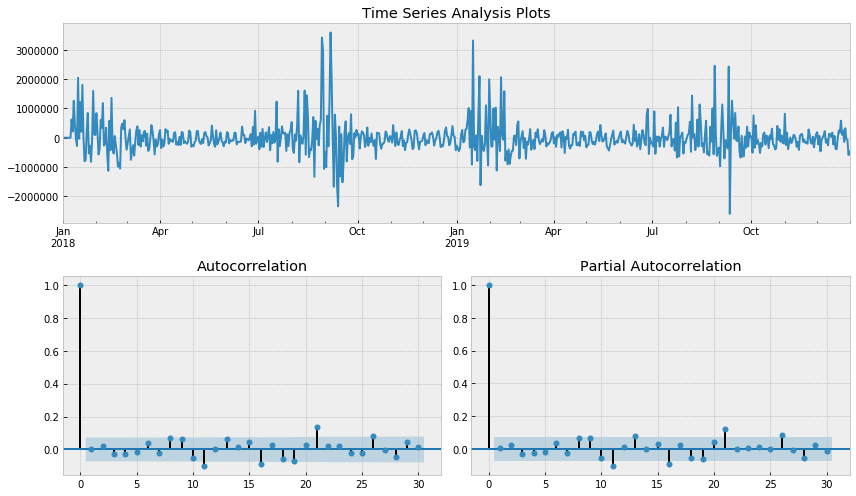

In [44]:
# Остатки
tsplot(best_model.resid, lags=30)
#print(scs.ttest_1samp(best_model.resid, 0))

In [45]:
best_model.fittedvalues.head(20)

2018-01-01    0.000000e+00
2018-01-02    0.000000e+00
2018-01-03    0.000000e+00
2018-01-04    0.000000e+00
2018-01-05    0.000000e+00
2018-01-06    0.000000e+00
2018-01-07    0.000000e+00
2018-01-08    0.000000e+00
2018-01-09    0.000000e+00
2018-01-10    2.028948e+05
2018-01-11    1.129260e+05
2018-01-12    5.192704e+05
2018-01-13    3.587353e+05
2018-01-14    2.821975e+05
2018-01-15    2.697905e+05
2018-01-16    1.280396e+06
2018-01-17    6.434967e+05
2018-01-18    1.754121e+06
2018-01-19    1.236786e+06
2018-01-20    1.334434e+06
Freq: D, dtype: float64

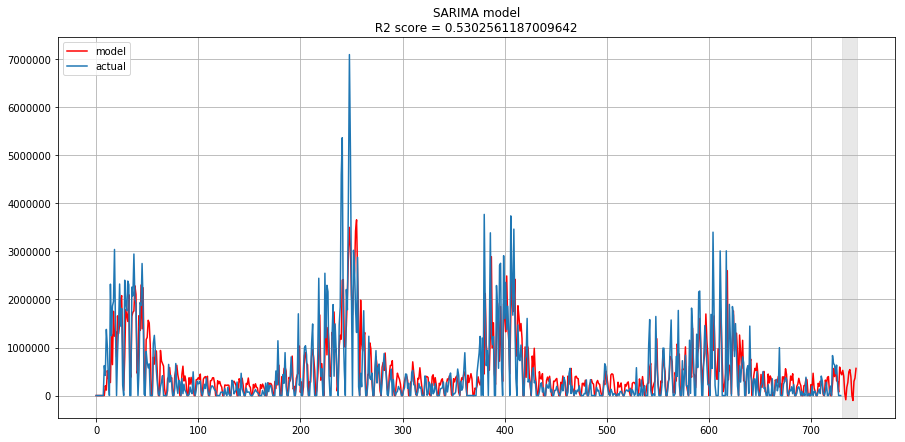

In [46]:
data["arima_model"] = best_model.fittedvalues
data.arima_model[data.arima_model < 0 ] = 0 # Нужно занулить отрицательные значения в модели ?
forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 14)

forecast = data.arima_model.append(forecast).values#[0:100]
actual = data.Cash.values#[0:100]
plt.figure(figsize=(15, 7))
plt.plot(forecast, color="r", label="model")
plt.title(
    "SARIMA model\n R2 score = {} ".format(
        r2_score(data.dropna().Cash, data.dropna().arima_model)
    )
)
plt.plot(actual, label="actual")
plt.legend()
plt.axvspan(len(actual), len(forecast), alpha=0.5, color="lightgrey")
plt.grid(True)

In [47]:
mean_absolute_error(data.dropna().Cash, data.dropna().arima_model)

319233.0381116817